![](https://tinyurl.com/vzqueep)


Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2),virus closely related to the SARS virus.

The virus first emerged in Wuhan, Hubei, China and is the cause of the 2019–20 coronavirus pandemic.

While the majority of cases result in mild symptoms,some progress to pneumonia and multi-organ failure.

The infection is spread from one person to others via respiratory droplets produced from the airways, often during coughing. Hand washing, maintaining distance from other people, and not touching one's face with unwashed hands are measures recommended to prevent the disease.It is also recommended to cover one's nose and mouth with a tissue or a bent elbow when coughing.

Masks are recommended for those who suspect they have the virus and for those who are taking care of someone with a suspected infection, but they are not recommended for the general public.

There is no vaccine or specific antiviral treatment.Management involves treatment of symptoms, supportive care, and experimental measures.

Source: https://en.wikipedia.org/wiki/Coronavirus_disease_2019

In this Notebook,we shall try to use various visualization Techniques to find out inferences about the pandemic.



**Please,visit this [link](https://www.iban.com/country-codes) to identify countries through ISO2 and ISO3 country naming convention which has been used in this notebook to avoid any confusion. **

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sars-outbreak-2003-complete-dataset/sars_2003_complete_dataset_clean.csv
/kaggle/input/ebolav-vs-sarscov-vs-mers/EBOLAV.fasta
/kaggle/input/ebolav-vs-sarscov-vs-mers/Civet-SARS.fasta
/kaggle/input/ebolav-vs-sarscov-vs-mers/MERS sequence.fasta
/kaggle/input/ebolav-vs-sarscov-vs-mers/SARS-COV2.fasta
/kaggle/input/ebolav-vs-sarscov-vs-mers/SARSr-COV.fasta
/kaggle/input/ebolav-vs-sarscov-vs-mers/BAT-SARS.fasta
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/covid19-corona-virus-india-dataset/complete.csv
/kaggle/input/covid19-corona-virus-india-dataset/web_scraping.ip

**Loading appropriate Packages and Data Preprocessing.**

In [2]:
!pip install pycountry-convert
!pip install country_converter --upgrade


     |████████████████████████████████| 45 kB 1.7 MB/s 
  Created wheel for country-converter: filename=country_converter-0.6.7-py3-none-any.whl size=50215 sha256=7c435fe95616bb218947b55f40d73c4a9bb740f7e32888e5900748749675fc02
  Stored in directory: /root/.cache/pip/wheels/c3/14/c5/643f9ed1d6335a90d70009ea68691f6bf65a3ad6b9e5d2aa3f
Successfully built country-converter


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import pycountry
import pycountry_convert as pc
import plotly.graph_objects as go
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import Phylo
from Bio.SeqUtils import GC
from functools import lru_cache
import warnings
warnings.filterwarnings('ignore')
from Bio.SeqUtils import GC_skew,molecular_weight

In [4]:
import pandas as pd
covid_clean = pd.read_csv("../input/corona-virus-report/covid_19_clean_complete.csv",parse_dates=['Date'])



In [5]:
covid_clean['Active'] = covid_clean['Confirmed'] - covid_clean['Deaths'] - covid_clean['Recovered']

covid_clean['Country/Region'] = covid_clean['Country/Region'].replace('Mainland China', 'China')

covid_clean[['Province/State']] = covid_clean[['Province/State']].fillna('unknown')


In [6]:
covid_ship =covid_clean[covid_clean['Province/State'].str.contains('Grand Princess')|covid_clean['Province/State'].str.contains('Diamond Princess cruise ship')]

In [7]:

@lru_cache(maxsize=None)
def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_2
    except:
        return np.nan

covid_clean['country_code'] = covid_clean["Country/Region"].apply(lambda country: do_fuzzy_search(country))

In [8]:
covid_clean["country_code"] = covid_clean.apply(lambda row:"TW" if row['Country/Region'] == 'Taipei and environs'   else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"IR" if row['Country/Region'] == 'Iran (Islamic Republic of)' else row['country_code'],axis = 1) 
covid_clean["country_code"] = covid_clean.apply(lambda row:"PS" if row['Country/Region'] == 'occupied Palestinian territory' else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"GB" if row['Country/Region'] == 'Channel Islands' else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"TW" if row['Country/Region'] == 'Taiwan*'  else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"KR" if row['Country/Region'] == 'Korea, South'  else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"CD" if row['Country/Region'] == 'Congo (Kinshasa)'  else row['country_code'],axis = 1)


In [9]:
@lru_cache(maxsize=None)
def do_continent_search(alpha2):
    try:
        result = pc.country_alpha2_to_continent_code(alpha2)
        return result
    except Exception:
        return np.nan



In [10]:
covid_clean['continent'] = covid_clean["country_code"].apply(lambda x: do_continent_search(x))

In [11]:
covid_clean["continent"] = covid_clean.apply(lambda row:"EU" if row['country_code'] == 'VA'   else row['continent'],axis = 1)


In [12]:
import country_converter as coco
@lru_cache(maxsize=None)
def alpha3(alpha2):
    try:
        result =coco.convert(names=alpha2, to='ISO3',not_found = np.NaN)
        return result
    except Exception:
        return np.nan

In [13]:
covid_clean['ISO3'] = covid_clean['country_code'].apply(lambda x:alpha3(x))

**Clean dataset with ISO2 and ISO3 country names and continent names**

In [14]:
covid_clean.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,country_code,continent,ISO3
0,unknown,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2,TH,AS,THA
1,unknown,Japan,36.0000,138.0000,2020-01-22,2,0,0,2,JP,AS,JPN
2,unknown,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0,SG,AS,SGP
3,unknown,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0,NP,AS,NPL
4,unknown,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0,MY,AS,MYS


In [15]:
latest_data = covid_clean[covid_clean["Date"] == max(covid_clean["Date"])].reset_index()
country_latest_data = latest_data.groupby('country_code').sum().reset_index()
countries_confirmed_cases = country_latest_data[country_latest_data['Confirmed']>0].reset_index()

**Visualizations**

In [16]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=countries_confirmed_cases["country_code"], y=countries_confirmed_cases['Confirmed'],marker_color = 'blue'),
    go.Bar(name = 'Deaths',x=countries_confirmed_cases["country_code"],y=countries_confirmed_cases['Deaths'],marker_color = 'crimson' )
])
fig.update_layout(barmode='stack',title_text ='Deaths vs Confirmed Cases')
fig.show()

In [17]:
fig = go.Figure(data=[
    go.Bar(name='Recovered', x=countries_confirmed_cases["country_code"], y=countries_confirmed_cases['Recovered'],marker_color = 'green'),
    go.Bar(name = 'Active',x=countries_confirmed_cases["country_code"],y=countries_confirmed_cases['Active'],marker_color = 'blue' ),
    go.Bar(name='Deaths', x=countries_confirmed_cases["country_code"], y=countries_confirmed_cases['Deaths'],marker_color = 'crimson'),
])
fig.update_layout(barmode='stack',title_text ='Confirmed Cases')
fig.show()

In [18]:
temp = covid_clean.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case')
fig.update_layout(barmode='stack',title_text ='Confirmed Cases')
fig.show()

In [19]:
from datetime import datetime
princess = covid_ship[covid_ship['Province/State'] == 'Grand Princess'].groupby('Date').sum().reset_index()
princess = princess[princess['Date']>'2020-03-03']

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=princess['Date'], y=princess['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=princess['Date'], y=princess['Recovered'],
                    mode='lines',
                    name='Recovered'))
fig.update_layout(barmode='stack',title_text ='Grand Princess Confirmed vs Recovered')

fig.show()

In [21]:
temp = covid_clean.groupby('Date').sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Confirmed'],
                    mode='lines',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovered'],
                    mode='lines',
                    name='Recovered'))
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Deaths'],
                    mode='lines',
                    name='Deaths'))
fig.update_layout(barmode='stack',title_text ='Covid Patterns')

fig.show()

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Active'],
                    mode='lines',
                    name='Active'))
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovered'],
                    mode='lines',
                    name='Recovered'))
fig.update_layout(barmode='stack',title_text ='Covid Patterns')

fig.show()

In [23]:
fig = px.line(covid_clean,x = "Date",y = "Confirmed")
fig.update_layout(title_text ='Date vs Confirmed Cases')
fig.show()

In [24]:
fig = px.line(covid_clean.groupby(['Date','country_code']).agg({'Confirmed':"sum"}).reset_index(),x = "Date",y = "Confirmed",color = "country_code")
fig.update_layout(title_text = 'Country-Wise Covid Distribution')

In [25]:
continent_data = covid_clean.groupby('continent').sum()
continent_data[["Confirmed","Deaths","Recovered","Active"]].style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
continent,,,,
AF,891,15,116,760
AS,2917814,90851,1118461,1708502
EU,172787,6148,9912,156727
NA,8240,159,200,7881
OC,1630,29,434,1167
SA,961,9,0,952


In [26]:
fig = px.line(covid_clean.groupby(['Date','continent']).agg({'Confirmed':"sum"}).reset_index(),x = "Date",y = "Confirmed",color = "continent")
fig.update_layout(title_text = 'Total Continent-Wise Covid Distribution')

In [27]:
continent_data['Mortality'] = 100*continent_data['Deaths']/continent_data['Confirmed']
continent_data[['Mortality']].style.background_gradient(cmap='Reds')

,Mortality
continent,
AF,1.6835
AS,3.11367
EU,3.55814
NA,1.92961
OC,1.77914
SA,0.936524


In [28]:
continent_data['Recovery Rate'] = 100*continent_data['Recovered']/continent_data['Confirmed']
continent_data[['Recovery Rate']].style.background_gradient(cmap='Greens')

,Recovery Rate
continent,
AF,13.0191
AS,38.3322
EU,5.73654
NA,2.42718
OC,26.6258
SA,0


In [29]:
fig = px.choropleth(latest_data.groupby('ISO3').sum().reset_index(), locations="ISO3", 
                    locationmode='ISO-3', color="Confirmed", 
                    hover_name="ISO3", range_color=[1,7000], 
                    title='Countries with Confirmed Cases',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [30]:
fig = px.choropleth(latest_data.groupby('ISO3').sum().reset_index(), locations="ISO3", 
                    locationmode='ISO-3', color="Deaths", 
                    hover_name="ISO3", range_color=[1,7000], 
                    title='World Wide Covid Deaths',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [31]:
fig = px.choropleth(latest_data.groupby('ISO3').sum().reset_index(), locations="ISO3", 
                    locationmode='ISO-3', color="Recovered", 
                    hover_name="ISO3", range_color=[1,7000], 
                    title='Recovered Cases World Wide ',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [32]:
country_latest = latest_data.groupby("ISO3").sum().reset_index()
country_latest["Mortality_Rate"] = 100*country_latest["Deaths"]/country_latest["Confirmed"]
mortality = country_latest[country_latest["Mortality_Rate"]>0].sort_values(by = 'Mortality_Rate',ascending= False)


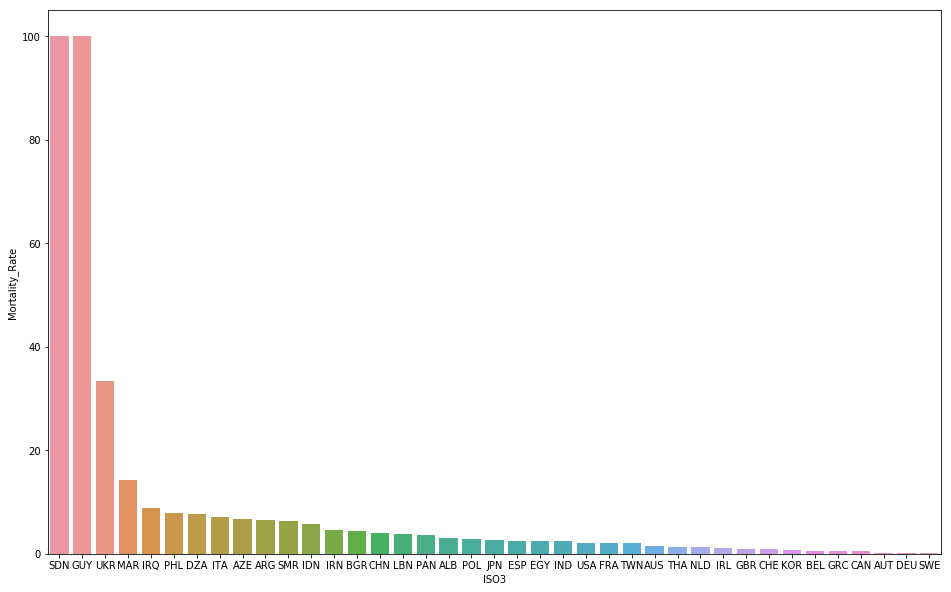

In [33]:
plt.figure(figsize = (16,10))
sns.barplot(y  = mortality.Mortality_Rate , x = mortality.ISO3,orient = 'v',)
plt.show()

In [34]:
ebola_clean = pd.read_csv("../input/ebola-outbreak-20142016-complete-dataset/ebola_2014_2016_clean.csv",parse_dates=['Date'])
ebola_clean = ebola_clean[['Date','Country','No. of confirmed cases','No. of confirmed deaths']]
ebola_clean.columns = ['Date','Country','Confirmed','Deaths']
ebola_clean.fillna(0,inplace = True)
ebola_clean['Confirmed'] = ebola_clean['Confirmed'].astype('int')
ebola_clean['Deaths'] = ebola_clean['Deaths'].astype('int')
ebola_clean['Country_code'] = ebola_clean["Country"].apply(lambda country: do_fuzzy_search(country))
ebola_clean['ISO3'] = ebola_clean['Country_code'].apply(lambda x:alpha3(x))
ebola_clean['Continent'] = ebola_clean["Country_code"].apply(lambda x: do_continent_search(x))
ebola_country = ebola_clean[ebola_clean['Date'] == max(ebola_clean['Date'])].groupby('Country_code').sum().reset_index()
ebola_time = ebola_clean.groupby('Date')['Confirmed', 'Deaths'].sum().reset_index()


In [35]:

ebola_country[["Country_code","Confirmed","Deaths"]].style.background_gradient(cmap='Reds')

,Country_code,Confirmed,Deaths
0,ES,1,0
1,GB,1,0
2,GN,3351,2083
3,IT,1,0
4,LR,3162,4
5,ML,7,0
6,NG,19,7
7,SL,8704,3589
8,SN,1,0
9,US,4,1


In [36]:
sars_clean = pd.read_csv('/kaggle/input/sars-outbreak-2003-complete-dataset/sars_2003_complete_dataset_clean.csv')
sars_clean.columns = ['Date','Country','Confirmed','Deaths','Recovered']
sars_clean['Country_code'] = sars_clean["Country"].apply(lambda country: do_fuzzy_search(country))
sars_clean["Country_code"] = sars_clean.apply(lambda row:"HK" if row['Country'] == 'Hong Kong SAR, China'   else row['Country_code'],axis = 1)
sars_clean["Country_code"] = sars_clean.apply(lambda row:"TW" if row['Country'] == 'Taiwan, China'   else row['Country_code'],axis = 1)
sars_clean["Country_code"] = sars_clean.apply(lambda row:"IE" if row['Country'] == 'Republic of Ireland'   else row['Country_code'],axis = 1)
sars_clean["Country_code"] = sars_clean.apply(lambda row:"MO" if row['Country'] == 'Macao SAR, China'   else row['Country_code'],axis = 1)
sars_clean['ISO3'] = sars_clean['Country_code'].apply(lambda x:alpha3(x))
sars_clean['Continent'] = sars_clean["Country_code"].apply(lambda x: do_continent_search(x))
sars_country = sars_clean[sars_clean['Date'] == max(sars_clean['Date'])].groupby('Country_code').sum().reset_index()
sars_time = sars_clean.groupby('Date')['Confirmed', 'Deaths','Recovered'].sum().reset_index()




In [37]:
sars_country[['Country_code','Confirmed','Deaths']].sort_values(by='Confirmed',ascending = False).head(10).style.background_gradient(cmap = 'Reds')

,Country_code,Confirmed,Deaths
3,CN,5327,348
10,HK,1755,298
27,TW,671,84
1,CA,250,38
25,SG,206,32
28,US,75,0
29,VN,63,5
21,PH,14,2
5,DE,10,0
26,TH,9,2


In [38]:
countries_confirmed_cases[['country_code','Confirmed','Deaths']].sort_values(by='Confirmed',ascending = False).head(10).style.background_gradient(cmap = 'Reds')

,country_code,Confirmed,Deaths
28,CN,80945,3180
61,IT,17660,1266
59,IR,11364,514
67,KR,7979,66
41,ES,5232,133
34,DE,3675,7
44,FR,3668,79
119,US,2179,47
24,CH,1139,11
89,NO,996,0


In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sars_time.index, y=sars_time['Confirmed'],
                    mode='lines',
                    name='SARS'))
fig.add_trace(go.Scatter(x=ebola_time.index, y=ebola_time['Confirmed'],
                    mode='lines',
                    name='Ebola'))
fig.add_trace(go.Scatter(x=temp.index, y=temp['Confirmed'],
                    mode='lines',
                    name='Covid19'))

fig.update_layout(barmode='stack',title_text ='epidemic Patterns(Day wise)')

fig.show()

In [40]:
import pandas as pd
complete = pd.read_csv("../input/covid19-corona-virus-india-dataset/complete.csv")

In [41]:
fig = px.choropleth(sars_clean.groupby('ISO3').sum().reset_index(), locations="ISO3", 
                    locationmode='ISO-3', color="Confirmed", 
                    hover_name="ISO3", range_color=[1,7000], 
                    title='Sars Epidemic',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [42]:
fig = px.choropleth(ebola_clean.groupby('ISO3').sum().reset_index(), locations="ISO3", 
                    locationmode='ISO-3', color="Confirmed", 
                    hover_name="ISO3", range_color=[1,7000], 
                    title='Ebola Epidemic',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [43]:
fig = px.choropleth(latest_data.groupby('ISO3').sum().reset_index(), locations="ISO3", 
                    locationmode='ISO-3', color="Confirmed", 
                    hover_name="ISO3", range_color=[1,7000], 
                    title='Countries with Confirmed Cases',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [44]:
from Bio import SeqIO

for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/EBOLAV.fasta", "fasta"):
    EBOLAV = str(seq_record.seq)
for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/MERS sequence.fasta", "fasta"):
    MERSV = str(seq_record.seq)
for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/SARS-COV2.fasta", "fasta"):
    COV2 = str(seq_record.seq)
for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/Civet-SARS.fasta", "fasta"):
    Civet_SARS = str(seq_record.seq)
for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/SARSr-COV.fasta", "fasta"):
    SARS_Cov = str(seq_record.seq)
for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/BAT-SARS.fasta", "fasta"):
    Bat_SARS = str(seq_record.seq)

In [45]:
CountyUAs_cases_table = pd.read_csv("../input/covid19-uk-dataset/CountyUAs_cases_table.csv")
NHSR_Cases_table = pd.read_csv("../input/covid19-uk-dataset/NHSR_Cases_table.csv")

bio_details = pd.read_csv("../input/corona-details/corona.csv")
bio_details = bio_details[['Accession','Protein','Geo_Location','Isolation_Source']]

In [46]:
weights_comparison = pd.DataFrame({'Virus':['SARS-CoV-2(COVID19)','EBOLAV','MERS-CoV','SARS-COV1(SARS)','BAT-SARS','CIVET-SARS'],
              'GC%':[GC(COV2),GC(EBOLAV),GC(MERSV),GC(SARS_Cov),GC(Bat_SARS),GC(Civet_SARS)],
              'molecular-Weight':[molecular_weight(COV2),molecular_weight(EBOLAV),molecular_weight(MERSV),molecular_weight(SARS_Cov),molecular_weight(Bat_SARS),molecular_weight(Civet_SARS)]})

In [47]:
color =['crimson','lightslategray','lightslategray','lightslategray','lightslategray','lightslategray']
fig = go.Figure(data=[go.Bar(x = weights_comparison["Virus"],  y =weights_comparison['GC%'],marker_color = color)])
fig.update_layout(title_text ='Guanine Gytosine Percentage')
fig.show()


In [48]:
color =['crimson','lightslategray','lightslategray','lightslategray','lightslategray','lightslategray']
fig = go.Figure(data=[go.Bar(x = weights_comparison["Virus"],  y =weights_comparison['molecular-Weight'],marker_color = color)])
fig.update_layout(title_text ='molecular-Weight')
fig.show()

In [49]:
fig = px.scatter(x =weights_comparison['GC%'], y =weights_comparison['molecular-Weight'],color = weights_comparison["Virus"])
fig.update_layout(title_text = 'Virus Scatter Plot')

In [50]:
from Levenshtein import distance as levenshtein_distance,seqratio
similarity = pd.DataFrame({"Virus":["SARS-CoV(SARS)","MERS","EBOLA","Civet-SARS","Bat-SARS"],"Percentage":[seqratio(COV2,SARS_Cov),seqratio(COV2,MERSV),seqratio(COV2,EBOLAV),seqratio(COV2,Civet_SARS),seqratio(COV2,Bat_SARS)]})


In [51]:
similarity.style.background_gradient(cmap='Reds')


,Virus,Percentage
0,SARS-CoV(SARS),0.83126
1,MERS,0.696411
2,EBOLA,0.62171
3,Civet-SARS,0.826338
4,Bat-SARS,0.827365


In [52]:
color =['crimson','lightslategray','lightslategray','crimson','crimson','crimson']
fig = go.Figure(data=[go.Bar(x = similarity["Virus"],  y =similarity['Percentage'],marker_color = color)])
fig.update_layout(title_text ='Percentage Similarity')
fig.show()

WE Can see SARS-COV2(Corona Virus) has very high similarity with SARS virus infecting Bats and Civets and SARSr-COV1(SARS infection virus).It is Least similar to EBOLA.

Note:We have taken Levenshtein distance as our metric for comparison.

In [53]:
isolation_source = pd.DataFrame(bio_details['Isolation_Source'].value_counts()).reset_index()
isolation_source.columns = ['Isolation_Source','Values']
isolation_source.style.background_gradient(cmap='Greens')

,Isolation_Source,Values
0,oronasopharynx,216
1,lung,120
2,"lung, oronasopharynx",70
3,feces,10
4,swab,6
5,blood,1


In [54]:
fig = px.pie(isolation_source, values='Values', names='Isolation_Source', title='Isolation_Sources')
fig.show()

Oronasopharynx and Lungs seem to be the best Isolation Sources to test for Covid-19.